# imports

In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

import ColorDataUtils.mattplotlib as mplt
from ColorDataUtils.multidata_utils import MultiExperiment

class Model:
    def __init__(self):
        pass
from models import iter_core

device = torch.device("cuda:1")

datadir = '/home/dbutts/ColorV1/Data/'
dirname = '/home/dbutts/ColorV1/CLRworkspace/'

%load_ext autoreload
%autoreload 2

Invoking __init__.py for NDNT.utils


# load data

In [2]:
num_lags=16
expt_names = ['J220715']#,'J220722','J220801','J220808']
array_types = ['UT']#, 'UT', 'UT', 'UT']
expts = MultiExperiment(expt_names)
data, drift_terms, mu0s = expts.load(datadir,
                                     num_lags=num_lags,
                                     et_metric_thresh=0.8,
                                     array_types=array_types,
                                     luminance_only=True,
                                     build_stim=False)

  FILE_INFO: stim_locsLP list again -- ok but output check
167520 total time steps, 239 units
J220715 68.5% fixations remaining


# computations per neuron

In [3]:
# what relationship do neurons have to filters in projection layer
layer_bounds, readout_weights = mplt.plot_readout_weights(iter_core.ndn_model, do_plot=False)

In [4]:
proj_weights = readout_weights[:layer_bounds[1]]
proj_weights.shape

(45, 587)

/tmp/ipykernel_66868/313760421.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dists, 'single')


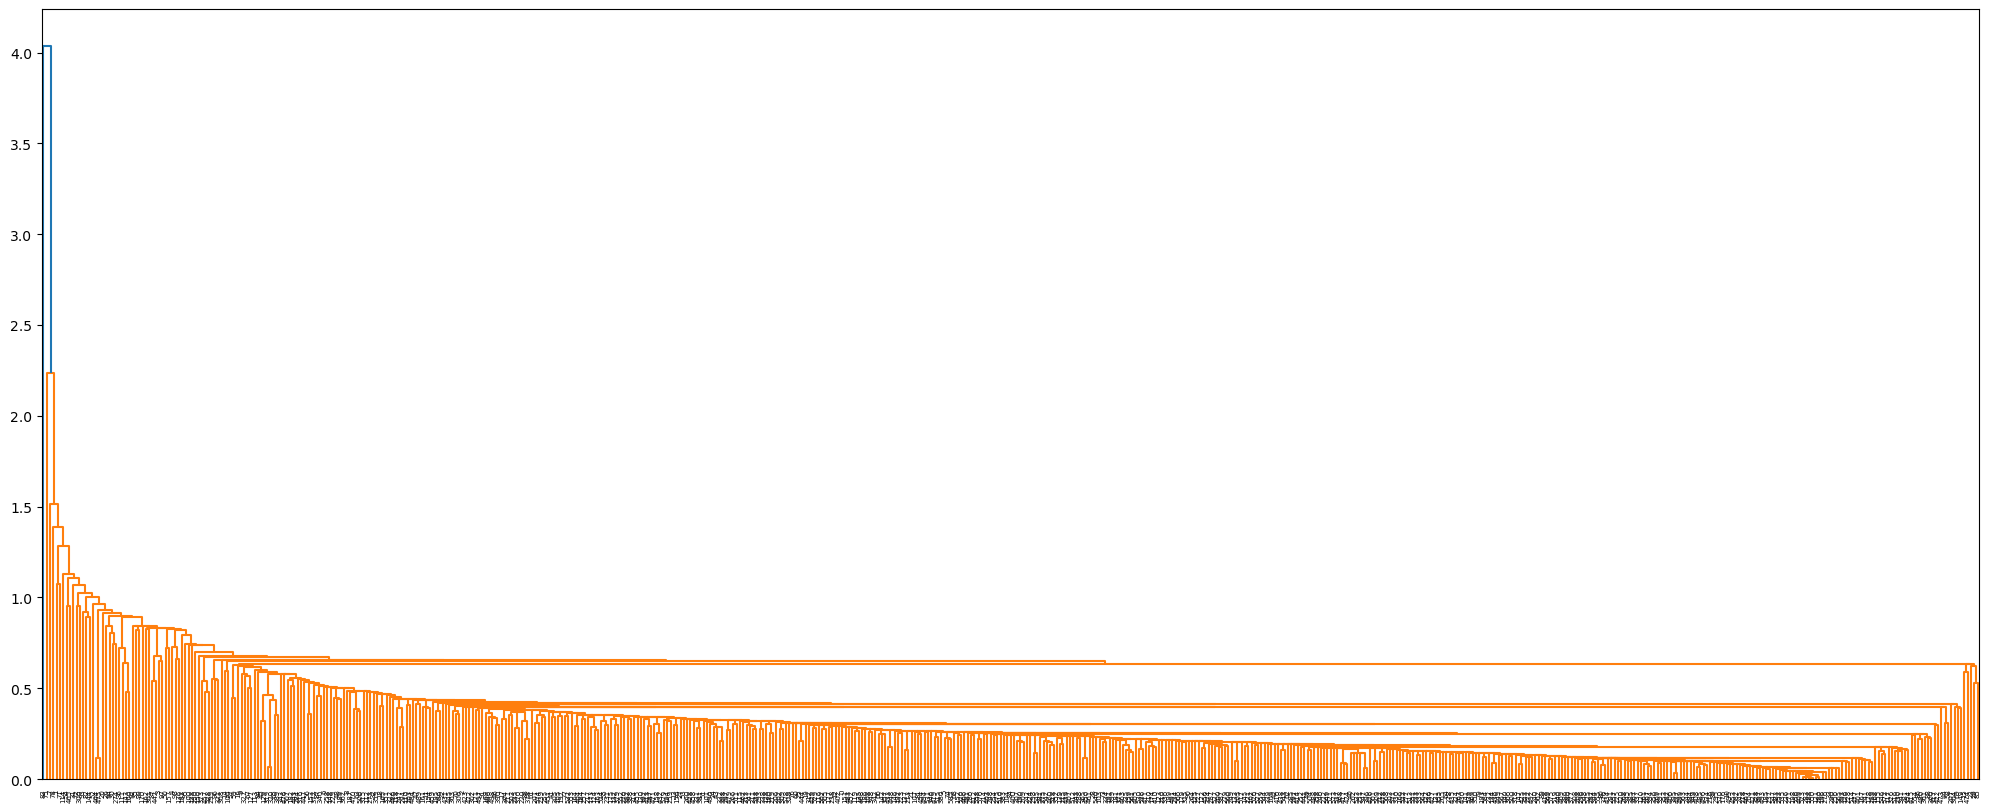

In [16]:
from scipy.cluster import hierarchy
# cluster the proj_weights
# make a distance matrix between the neurons based on their weights
dists = np.zeros((proj_weights.T.shape[0], proj_weights.T.shape[0]))
for i in range(proj_weights.T.shape[0]):
    for j in range(proj_weights.T.shape[0]):
        dists[i,j] = np.sum(np.abs((proj_weights.T[i] - proj_weights.T[j])))

Z = hierarchy.linkage(dists, 'single')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)

In [6]:
# what relationship do channels have to filters in projection layer


# computations per channel